### Introduction

<br><br>**E-retail factors for customer activation and retention: A case study from Indian e-commerce customers**<br><br>

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
# loading the dataset
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\Customer_retention_dataset--1-\Customer_retention_dataset\customer_retention_dataset.xlsx")

In [3]:
# Setting display options for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# removing special characters from the data
spec_chars = ["\t"]
for char in spec_chars:
    df.columns = df.columns.str.replace(char, '')

### Data Analysis

In [5]:
# checking first five rows of the data
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Abo

In [6]:
# checking the number of rows and columns of the given dataset
df.shape

(269, 71)

In [7]:
# Checking column names of the dataset
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?                                        ',
       '10 What is the operating system (OS) of your device?                                          ',
       '11 What browser do you run on your device to access the website?                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online re

In [8]:
# renaming the columns for convenience


df.rename({'1Gender of respondent': 'Gender', '2 How old are you? ': 'Age', '3 Which city do you shop online from?': 'City', '4 What is the Pin Code of where you shop online from?': 'PinCode', '5 Since How Long You are Shopping Online ?': 'Shopping_since', '6 How many times you have made an online purchase in the past 1 year?': "Shopping_frequency", '7 How do you access the internet while shopping on-line?': 'Access_mode',
         '8 Which device do you use to access the online shopping?' : 'Shopping_device', 
          '9 What is the screen size of your mobile device?                                        ' : 'mobile_screen_size',
         '10 What is the operating system (OS) of your device?                                          ': 'device_OS' ,
         '11 What browser do you run on your device to access the website?                                                          ': 'browser'}, axis=1, inplace=True)

In [9]:
# renaming the columns for convenience


df.rename({'12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ': 'channel_used_first_time',           
       '13 After first visit, how do you reach the online retail store?                                                   ': 'channel_used_second_time',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ' : 'time_spent_befpre_purchase',
       '15 What is your preferred payment Option?                                                                                                                               ': 'pref_payment_option',    
       '17 Why did you abandon the “Bag”, “Shopping Cart”?                                                                                                                                                       ' : 'bag_abandon_reason' ,                                                                                                                                                     
       '18 The content on the website must be easy to read and understand': 'content_easy_to read',
       '19 Information on similar product to the one highlighted  is important for product comparison': 'similar_product_comparision',
       '20 Complete information on listed seller and product being offered is important for purchase decision.': 'imp_info_purchase_decision',
       '21 All relevant information on listed products must be stated clearly' : 'rel_info_stated_clearly',
       '22 Ease of navigation in website': 'navigation_ease', '23 Loading and processing speed': 'processing_speed',
       '24 User friendly Interface of the website': 'user_friendly_interface',
       '25 Convenient Payment methods': 'Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time': 'trust_transation',
       '27 Empathy (readiness to assist with queries) towards the customers': 'empathy_towards_customers',
       '28 Being able to guarantee the privacy of the customer': "data_privacy",
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)': 'comm_availability',
       '30 Online shopping gives monetary benefit and discounts': 'benefits_and_discounts',
       '31 Enjoyment is derived from shopping online' :'enjoyment',
       '32 Shopping online is convenient and flexible': 'convenient_flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision': 'return_policy',
       '34 Gaining access to loyalty programs is a benefit of shopping online' : 'access_to_loyalty_programs',
       '35 Displaying quality Information on the website improves satisfaction of customers' : 'qual-info_satisfaction',
       '36 User derive satisfaction while shopping on a good quality website or application': 'good_qual_web_app',
       '37 Net Benefit derived from shopping online can lead to users satisfaction': "net_benefit_user_satisfaction",
       '38 User satisfaction cannot exist without trust': 'no_trust_no_satisfaction_',
       '39 Offering a wide variety of listed product in several category': 'wide_variety',
       '40 Provision of complete and relevant product information': 'relavant_product_info',
       '41 Monetary savings' : 'Monetar_savings',
       '42 The Convenience of patronizing the online retailer' : 'Convenience of patronizing ',
       '43 Shopping on the website gives you the sense of adventure' : 'sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status' : 'preferred e-tailer_social_status',
       '45 You feel gratification shopping on your favorite e-tailer': 'fav_e-tailer_gratification',
       '46 Shopping on the website helps you fulfill certain roles' : 'website_fulfill_certain_roles',
       '47 Getting value for money spent': 'value_money_spent',
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ' : 'shopped_retailers',                                                                          
       'Longer time to get logged in (promotion, sales period)': 'login_time_during_sale',
       'Longer time in displaying graphics and photos (promotion, sales period)': 'displaying_time_during sale',
       'Late declaration of price (promotion, sales period)': 'price_decl_sale',
       'Longer page loading time (promotion, sales period)': 'page_loading_time_sale',
       'Limited mode of payment on most products (promotion, sales period)': 'payment_modes_during_sale',
       'Which of the Indian online retailer would you recommend to a friend?': 'your_IND_online_retailer_recommendation'}, axis=1, inplace= True)

In [10]:
df.rename({'16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?                                                   ' : 'abondoning_cart_freq'}, axis=1, inplace= True)

In [11]:
# checking the first five rows of the dataset after changing the column names.
df.head()

,Gender,Age,City,PinCode,Shopping_since,Shopping_frequency,Access_mode,Shopping_device,mobile_screen_size,device_OS,browser,channel_used_first_time,channel_used_second_time,time_spent_befpre_purchase,pref_payment_option,abondoning_cart_freq,bag_abandon_reason,content_easy_to read,similar_product_comparision,imp_info_purchase_decision,rel_info_stated_clearly,navigation_ease,processing_speed,user_friendly_interface,Convenient Payment methods,trust_transation,empathy_towards_customers,data_privacy,comm_availability,benefits_and_discounts,enjoyment,convenient_flexible,return_policy,access_to_loyalty_programs,qual-info_satisfaction,good_qual_web_app,net_benefit_user_satisfaction,no_trust_no_satisfaction_,wide_variety,relavant_product_info,Monetar_savings,Convenience of patronizing,sense of adventure,preferred e-tailer_social_status,fav_e-tailer_gratification,website_fulfill_certain_roles,value_money_spent,shopped_retailers,Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,login_time_during_sale,displaying_time_during sale,price_decl_sale,page_loading_time_sale,payment_modes_during_sale,Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,your_IND_online_retailer_recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipk

In [12]:
# checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Gender                                                    269 non-null    object
 1   Age                                                       269 non-null    object
 2   City                                                      269 non-null    object
 3   PinCode                                                   269 non-null    int64 
 4   Shopping_since                                            269 non-null    object
 5   Shopping_frequency                                        269 non-null    object
 6   Access_mode                                               269 non-null    object
 7   Shopping_device                                           269 non-null    object
 8   mobile_screen_size            

In [13]:
checking missing values
# df.isnull().values.any()

False

There are no null values in the dataset.

In [14]:
# checking the Gender count
df['Gender'].value_counts()

Female    181
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

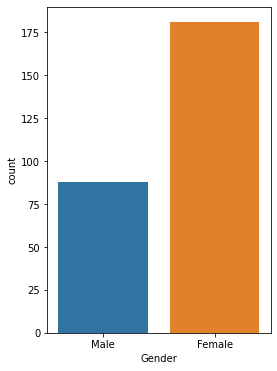

In [15]:
# Barplot displaying Gender column

plt.subplots(figsize=(4, 6))
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='City', ylabel='count'>

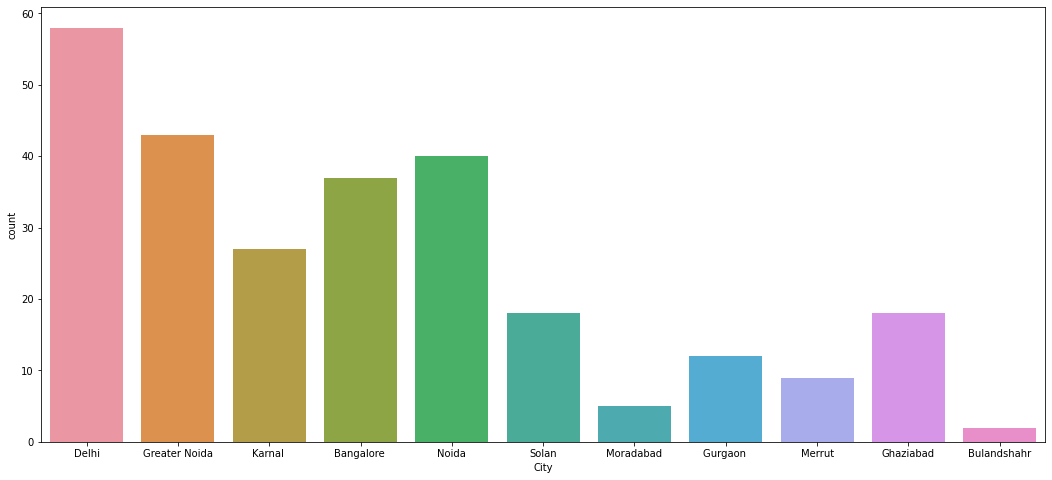

In [16]:
# Barplot displaying City column

plt.subplots(figsize=(18, 8))
sns.countplot(df['City'])

In [17]:
# Checking unique values in the Age column
df['Age'].unique()

array(['31-40 years', '21-30 years', '41-50 yaers', 'Less than 20 years',
       '51 years and above'], dtype=object)

<AxesSubplot:xlabel='Age', ylabel='count'>

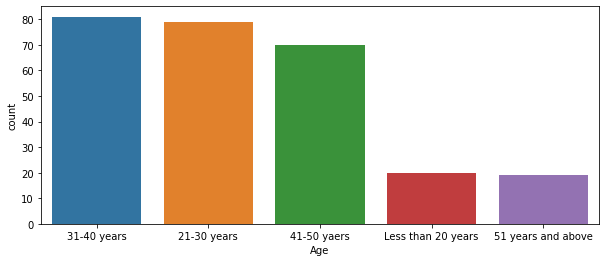

In [18]:
# Barplot displaying Age column

plt.subplots(figsize=(10, 4))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

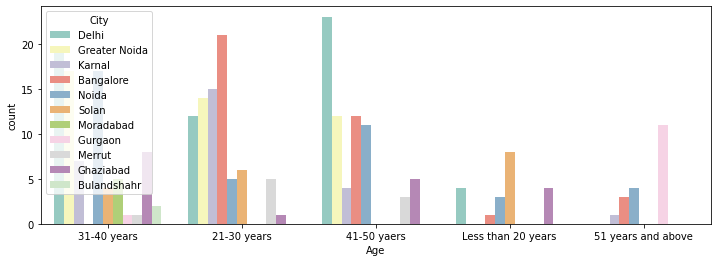

In [19]:
# Checking the relation between Age of the customer against the City from which they are shopping

plt.subplots(figsize=(12,4))
sns.countplot('Age', hue='City',data=df, palette='Set3')

We can see that a large number of surveyed people betwen the Age group 31-40 years and 41-50 years from Delhi are using e-Commerce sites.  Bangalore has the highest number of e-Commerce sites users in the Age group 21-30 years. Solan has the highest number of users in the Age Group Less than 20 years. In the Age group 51 years and above, Gurgaon has highest number of users when compared to the other cities in the dataset. 

In [20]:
# checking Shopping_since column
df['Shopping_since'].unique()

array(['Above 4 years', '3-4 years', '2-3 years', 'Less than 1 year',
       '1-2 years'], dtype=object)

<AxesSubplot:xlabel='Shopping_since', ylabel='count'>

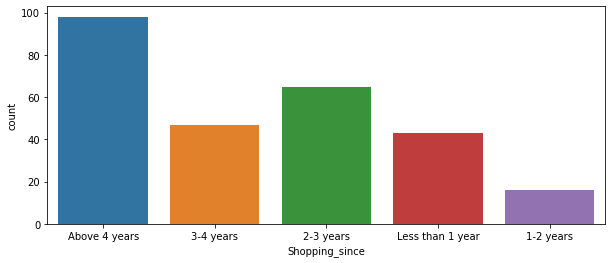

In [21]:
# Bargraph displaying Shapping_since column

plt.subplots(figsize=(10, 4))
sns.countplot(df['Shopping_since'])

In [22]:
# checking how many time customers used online shopping in the past year
df['Shopping_frequency'].unique()

array(['31-40 times', '41 times and above', 'Less than 10 times',
       '11-20 times', '21-30 times', '42 times and above'], dtype=object)

<AxesSubplot:xlabel='Shopping_frequency', ylabel='count'>

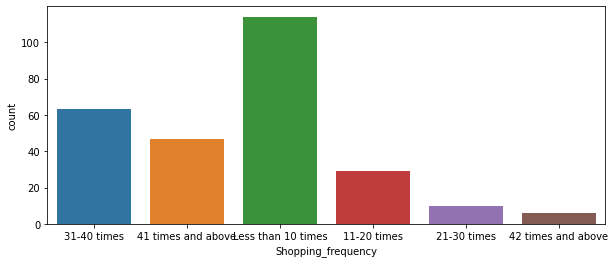

In [23]:
# Bargraph displaying the shopping frequency in the past one year

plt.subplots(figsize=(10, 4))
sns.countplot(df['Shopping_frequency'])

<AxesSubplot:xlabel='Shopping_frequency', ylabel='count'>

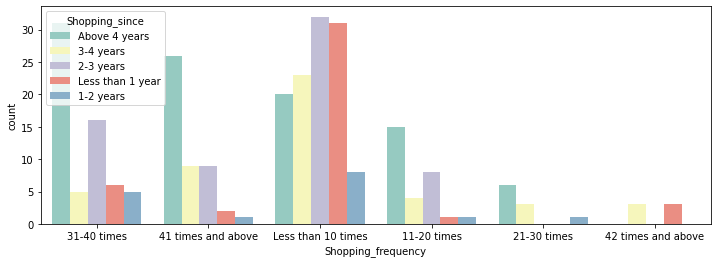

In [24]:
# checking the shopping frequency depending on the time from which the customer is using the online sites for shopping

plt.subplots(figsize=(12,4))
sns.countplot('Shopping_frequency', hue='Shopping_since',data=df, palette='Set3')

<AxesSubplot:xlabel='Shopping_frequency', ylabel='count'>

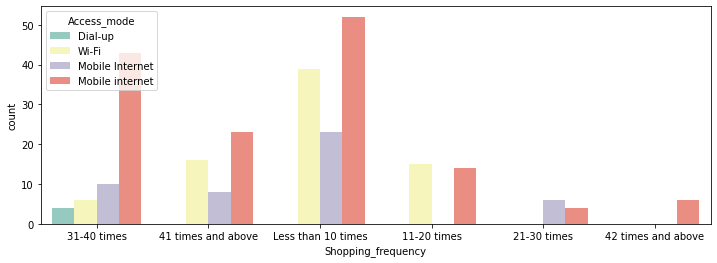

In [25]:
# Let us check how the shopping frequency in the past year is affected by the shopping device used.

plt.subplots(figsize=(12,4))
sns.countplot('Shopping_frequency', hue='Access_mode',data=df, palette='Set3')

<AxesSubplot:xlabel='channel_used_first_time', ylabel='count'>

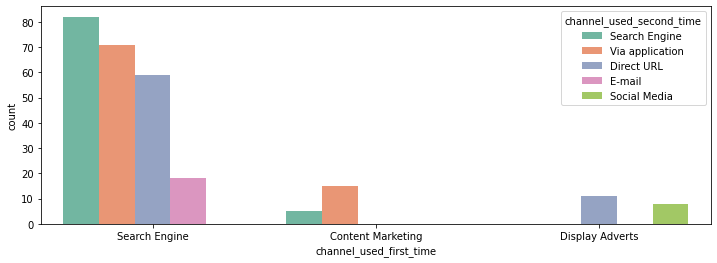

In [26]:
# Let us now compare the channel used for the first time versus channel used for the second time

plt.subplots(figsize=(12,4))
sns.countplot('channel_used_first_time', hue='channel_used_second_time',data=df, palette='Set2')

<AxesSubplot:xlabel='time_spent_befpre_purchase', ylabel='count'>

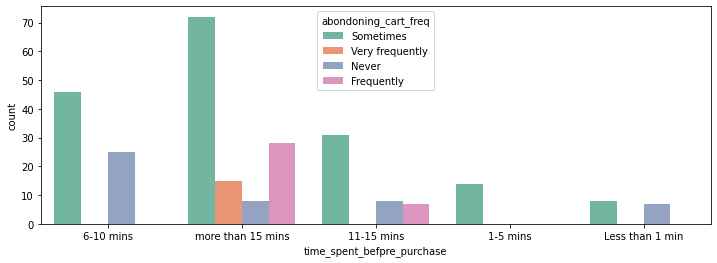

In [27]:
# Comparing the time spent before purchase versus the frequency of abondoning the cart

plt.subplots(figsize=(12,4))
sns.countplot('time_spent_befpre_purchase', hue='abondoning_cart_freq',data=df, palette='Set2')

In [28]:
# checking unique values in the bag abondon reason column

df['bag_abandon_reason'].unique()

array(['Lack of trust', 'Promo code not applicable',
       'Better alternative offer', 'Change in price',
       'No preferred mode of payment'], dtype=object)

<AxesSubplot:ylabel='bag_abandon_reason'>

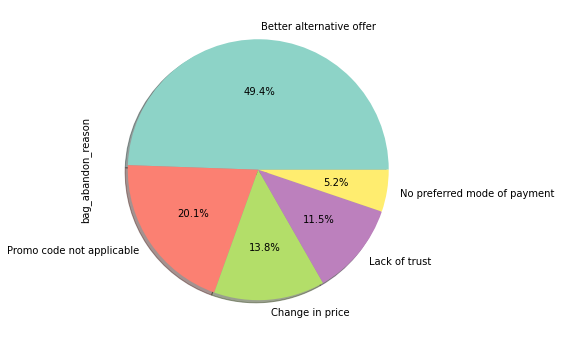

In [29]:
# pie chart showing the reasons for abandoning the bag

plt.subplots(figsize=(16,6))
df['bag_abandon_reason'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, cmap='Set3')

<AxesSubplot:xlabel='bag_abandon_reason', ylabel='count'>

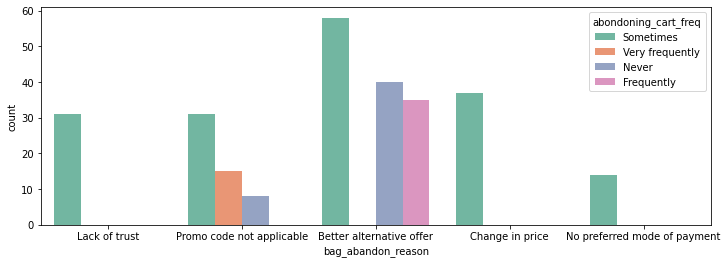

In [30]:
# checking how the reason for abandoning the bag/shopping cart affects the frequency of abandoning the cart

plt.subplots(figsize=(12,4))
sns.countplot('bag_abandon_reason', hue='abondoning_cart_freq',data=df, palette='Set2')

In [31]:
# Checking the unique values in customer recommended shopping sites

df['your_IND_online_retailer_recommendation'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: your_IND_online_retailer_recommendation, dtype: int64

In [32]:
# Checking the unique values in Website is as efficient as before

df['Website is as efficient as before'].value_counts()

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64

<AxesSubplot:xlabel='Website is as efficient as before', ylabel='count'>

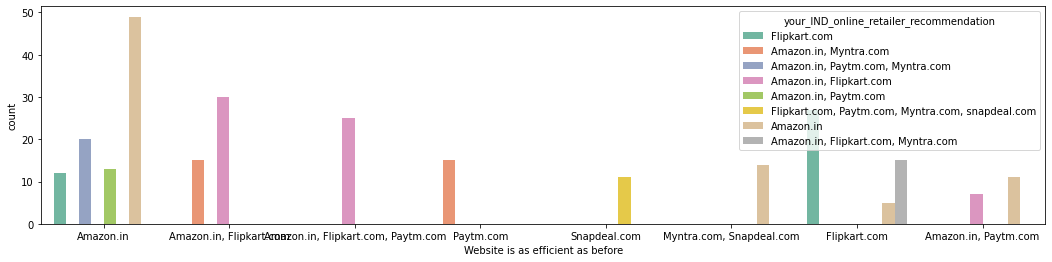

In [33]:
# checking how the website efficiency affects the recommendation

plt.subplots(figsize=(18,4))
sns.countplot('Website is as efficient as before', hue='your_IND_online_retailer_recommendation',data=df, palette='Set2')

In [34]:
# Here, I am creating a new dataframe named cx_opinions with the columns of customers opinions regarding online shopping

cx_opinions= df[['content_easy_to read', 'similar_product_comparision', 'imp_info_purchase_decision', 'rel_info_stated_clearly','navigation_ease',
               'processing_speed', 'user_friendly_interface', 'Convenient Payment methods', 'trust_transation', 'empathy_towards_customers', 'data_privacy', 'comm_availability', 'benefits_and_discounts', 'enjoyment', 'convenient_flexible',
               'return_policy', 'access_to_loyalty_programs', 'qual-info_satisfaction', 'good_qual_web_app', 'net_benefit_user_satisfaction',
               'no_trust_no_satisfaction_', 'wide_variety', 'relavant_product_info', 'Monetar_savings',
               'sense of adventure', 'preferred e-tailer_social_status', 'fav_e-tailer_gratification', 'website_fulfill_certain_roles', 'value_money_spent']]

In [35]:
# replacing the values of the above columns with numbers

myCoding = {'Strongly agree (5)': 5, 'Agree (4)': 4, 'indifferent (3)': 3, 'Dis-agree (2)': 2,'Strongly disagree (1)' : 1}

In [36]:
# applying the above renamed values to the columns of the newly created dataframe

for i in cx_opinions.columns:
    cx_opinions[i]=cx_opinions[i].replace({'Strongly agree (5)': 5, 'Agree (4)': 4, 'indifferent (3)': 3, 'Dis-agree (2)': 2,'Strongly disagree (1)' : 1})
    
cx_opinions.head()

,content_easy_to read,similar_product_comparision,imp_info_purchase_decision,rel_info_stated_clearly,navigation_ease,processing_speed,user_friendly_interface,Convenient Payment methods,trust_transation,empathy_towards_customers,data_privacy,comm_availability,benefits_and_discounts,enjoyment,convenient_flexible,return_policy,access_to_loyalty_programs,qual-info_satisfaction,good_qual_web_app,net_benefit_user_satisfaction,no_trust_no_satisfaction_,wide_variety,relavant_product_info,Monetar_savings,sense of adventure,preferred e-tailer_social_status,fav_e-tailer_gratification,website_fulfill_certain_roles,value_money_spent
0,4,Indifferent (3),Indifferent (3),4,4,1,2,2,Disagree (2),5,4,4,3,1,2,2,4,3,5,4,5,3,3,Disagree (2),4,4,5,4,5
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,5,5,5
2,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,3,3,4
3,4,4,Indifferent (3),4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,5,4,3,4
4,5,Indifferent (3),Indifferent (3),4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,3,1,5,1,5


In [37]:
# as some values are not replaced above, replacing them with respective values again

new_cx_opinions =cx_opinions.replace({'Indifferent (3)': 3, 'Disagree (2)': 2})

In [38]:
# checking the first five rows of the new dataframe

new_cx_opinions.head()

,content_easy_to read,similar_product_comparision,imp_info_purchase_decision,rel_info_stated_clearly,navigation_ease,processing_speed,user_friendly_interface,Convenient Payment methods,trust_transation,empathy_towards_customers,data_privacy,comm_availability,benefits_and_discounts,enjoyment,convenient_flexible,return_policy,access_to_loyalty_programs,qual-info_satisfaction,good_qual_web_app,net_benefit_user_satisfaction,no_trust_no_satisfaction_,wide_variety,relavant_product_info,Monetar_savings,sense of adventure,preferred e-tailer_social_status,fav_e-tailer_gratification,website_fulfill_certain_roles,value_money_spent
0,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,4,4,5,4,5
1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,5,5,5
2,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,3,3,4
3,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,5,4,3,4
4,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,3,1,5,1,5


In [39]:
# Creating new set of data by storing the frequencies of the data of the above dataframe

frequencies = {}
for i in new_cx_opinions.columns:
    frequencies[i] = new_cx_opinions[i].value_counts()

In [40]:
# creating dataframe of frequencies and named it as plotdata

plotdata = pd.DataFrame(frequencies)
plotdata.head()

,content_easy_to read,similar_product_comparision,imp_info_purchase_decision,rel_info_stated_clearly,navigation_ease,processing_speed,user_friendly_interface,Convenient Payment methods,trust_transation,empathy_towards_customers,data_privacy,comm_availability,benefits_and_discounts,enjoyment,convenient_flexible,return_policy,access_to_loyalty_programs,qual-info_satisfaction,good_qual_web_app,net_benefit_user_satisfaction,no_trust_no_satisfaction_,wide_variety,relavant_product_info,Monetar_savings,sense of adventure,preferred e-tailer_social_status,fav_e-tailer_gratification,website_fulfill_certain_roles,value_money_spent
1,18.0,NaN,11.0,18.0,18.0,12.0,18.0,NaN,NaN,18.0,NaN,11.0,18.0,30.0,NaN,NaN,11.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,5.0,33.0,18.0,33.0,NaN
2,NaN,18.0,18.0,12.0,5.0,18.0,12.0,30.0,30.0,NaN,NaN,NaN,11.0,19.0,12.0,20.0,15.0,NaN,8.0,11.0,7.0,7.0,5.0,31.0,50.0,29.0,22.0,22.0,NaN
3,7.0,43.0,52.0,NaN,NaN,12.0,5.0,NaN,NaN,15.0,26.0,15.0,50.0,75.0,33.0,NaN,64.0,56.0,NaN,40.0,5.0,57.0,31.0,15.0,59.0,100.0,101.0,88.0,38.0
4,80.0,92.0,101.0,132.0,105.0,112.0,45.0,80.0,86.0,42.0,58.0,94.0,85.0,59.0,78.0,51.0,64.0,80.0,86.0,54.0,117.0,94.0,98.0,75.0,101.0,59.0,63.0,88.0,149.0
5,164.0,116.0,87.0,107.0,141.0,115.0,189.0,159.0,141.0,194.0,185.0,149.0,105.0,86.0,146.0,198.0,115.0,133.0,175.0,164.0,122.0,111.0,135.0,148.0,54.0,48.0,65.0,38.0,82.0


I am dividing the above dataset into four sets for convenience of plotting bargraphs

In [41]:
cols = [0,1,2,3,4,5,6,7,8,9]
plt1 = plotdata[plotdata.columns[cols]]

<AxesSubplot:>

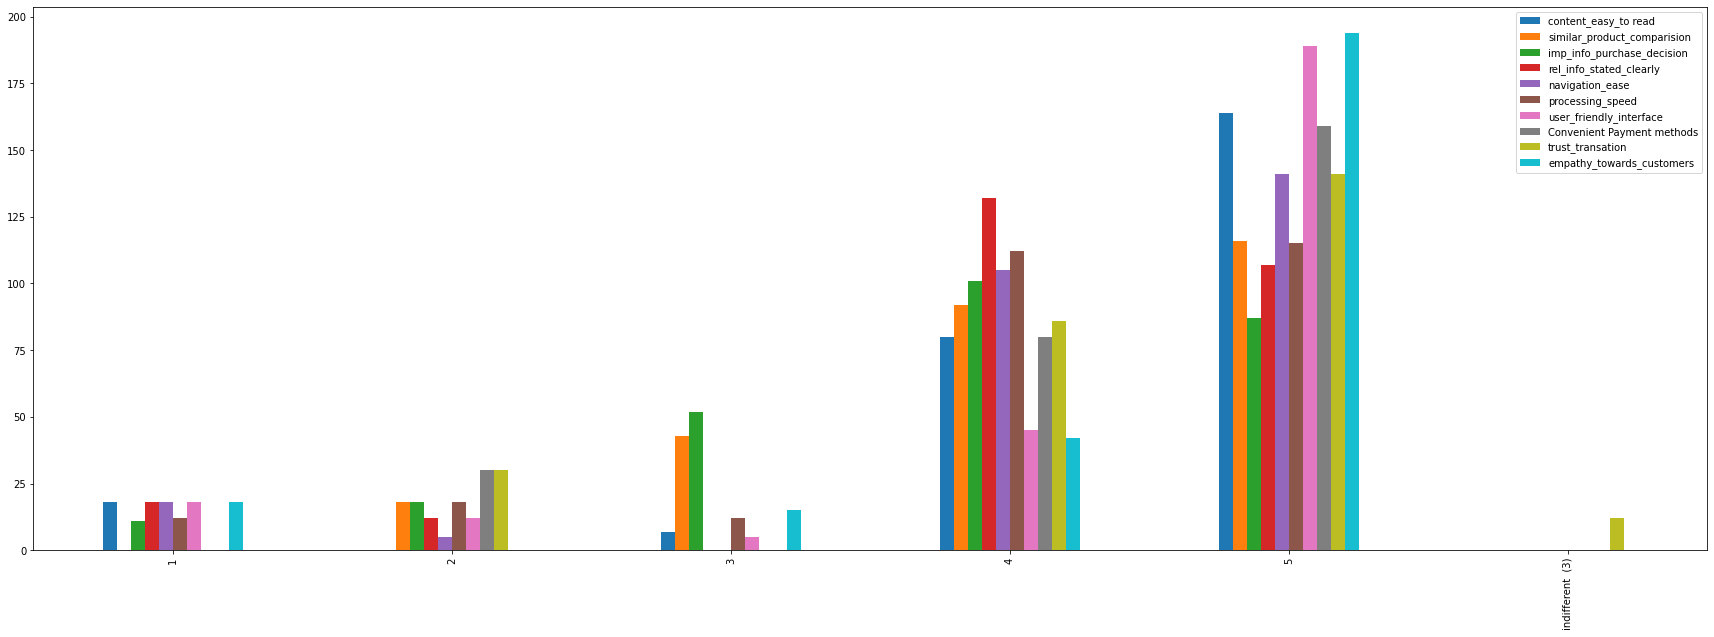

In [42]:
plt1.plot(kind='bar', figsize = (30,10))

In [43]:
cols2 = [10,11,12,13,14,15,16,17,18,19]
plt2 = plotdata[plotdata.columns[cols2]]

<AxesSubplot:>

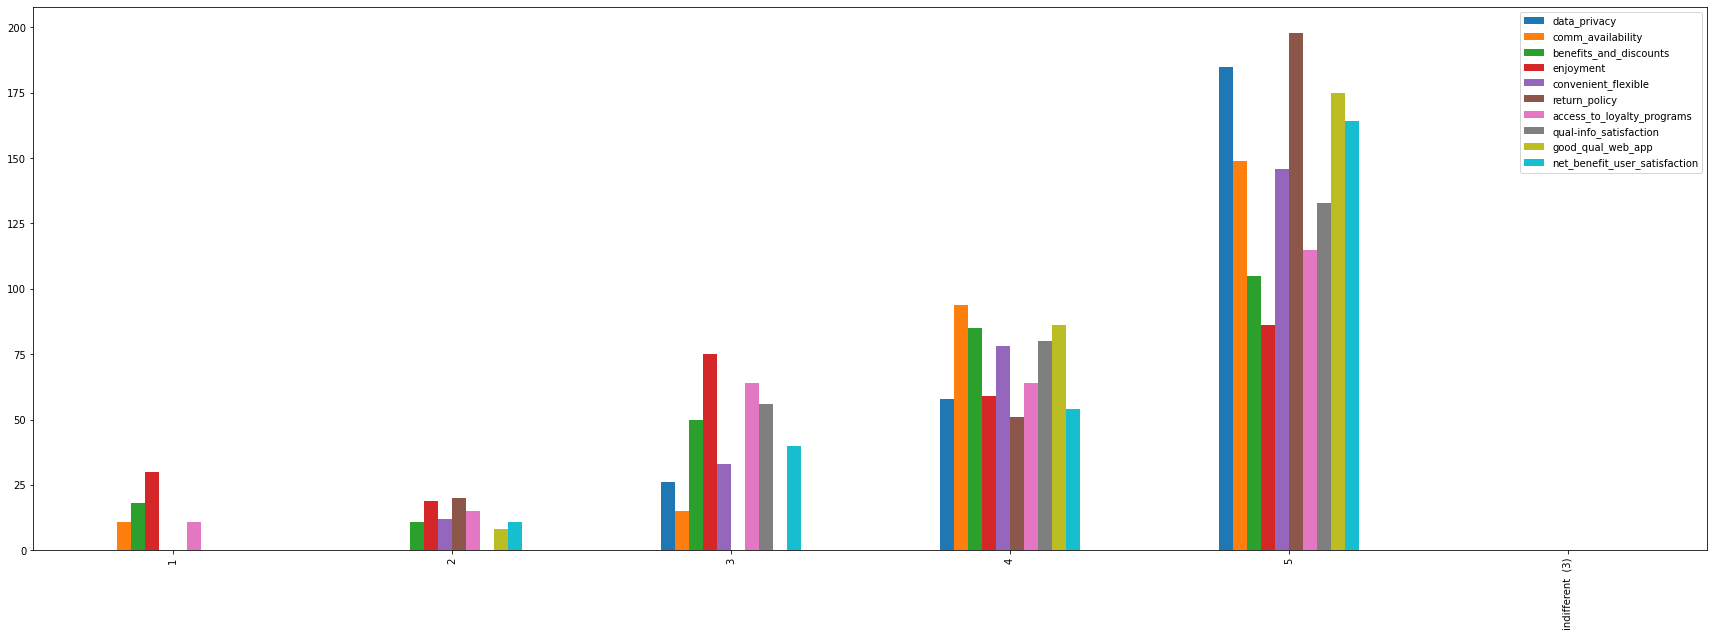

In [44]:
plt2.plot(kind='bar', figsize = (30,10))

In [45]:
cols3 = [20,21,22,23,24,25,26,27,28]
plt3 = plotdata[plotdata.columns[cols3]]

<AxesSubplot:>

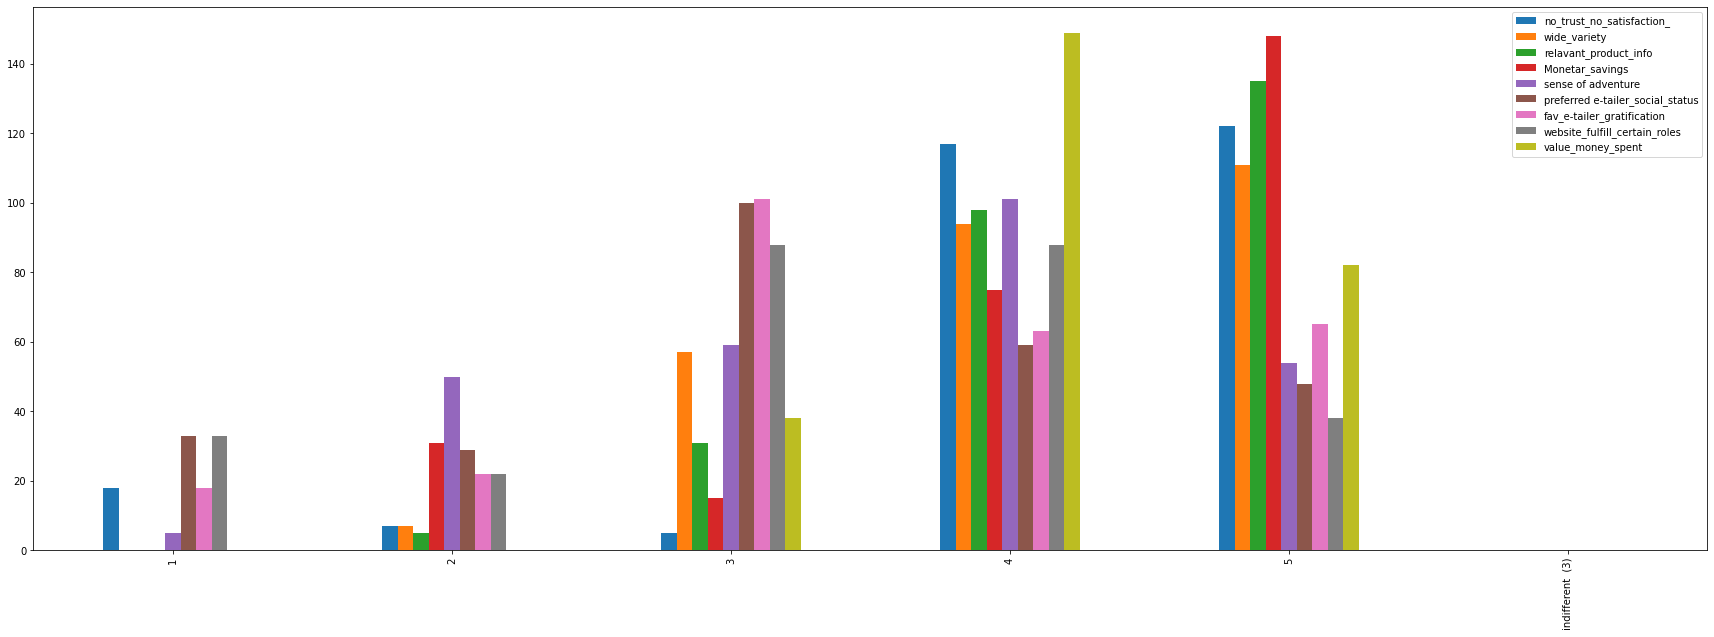

In [46]:
plt3.plot(kind='bar', figsize = (30,10))

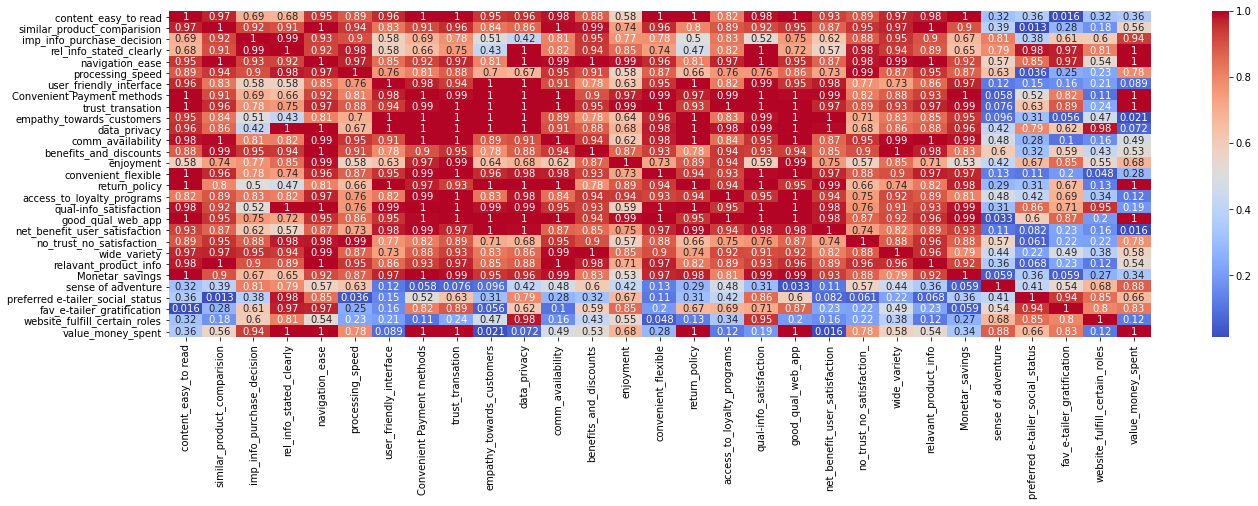

In [47]:
# correlation of plotdata

data_corr = plotdata.corr().abs()
plt.figure(figsize=(22, 6))
sns.heatmap(data_corr, annot=True,cmap='coolwarm')
plt.show()

We can see that good quality of the website gives enjoyment to the customers as they have positive correlation of 0.99. Also, content easy to read and relavant product info also has high positive correlation. There are certain other factors which affect the shopping experience.

<AxesSubplot:ylabel='shopped_retailers'>

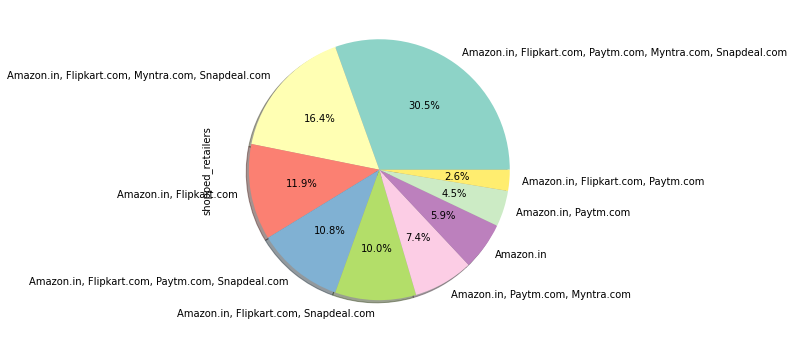

In [49]:
# Checking the e-Commerce website names the customers have shopped from

plt.subplots(figsize=(16,6))
df['shopped_retailers'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, cmap='Set3')

<AxesSubplot:ylabel='Easy to use website or application'>

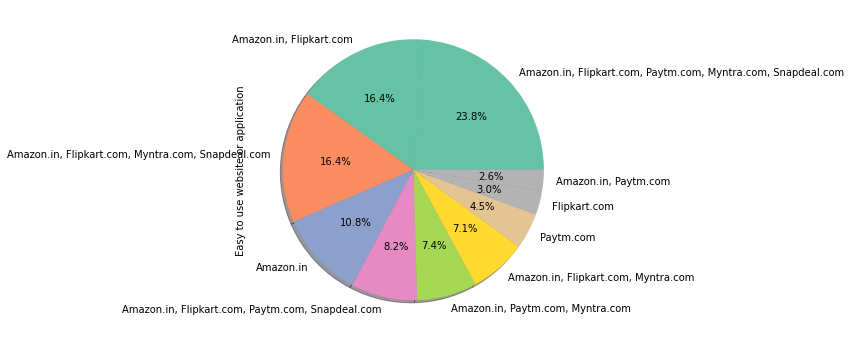

In [50]:
# Checking what webiste or App that was easy to use based on customer selected option from this respective column

plt.subplots(figsize=(16,6))
df['Easy to use website or application'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, cmap='Set2')

In [55]:
# checking the count of various websites recommended by the customers

df['your_IND_online_retailer_recommendation'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: your_IND_online_retailer_recommendation, dtype: int64

<AxesSubplot:xlabel='your_IND_online_retailer_recommendation', ylabel='count'>

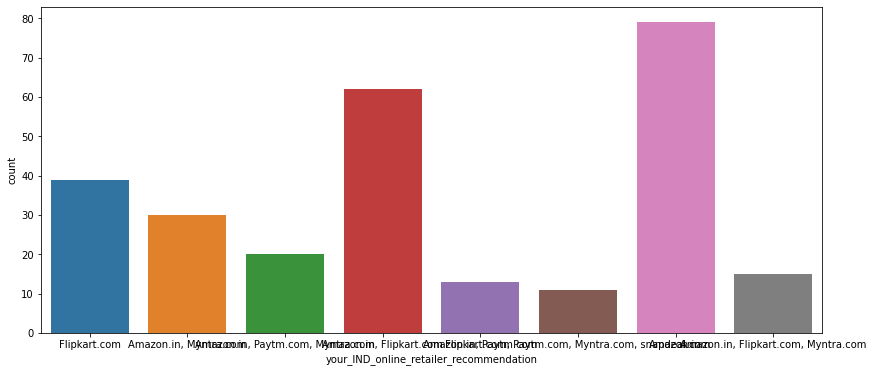

In [51]:
# plotting bargraph for your_IND_online_retailer_recommendation

plt.subplots(figsize=(14, 6))
sns.countplot(df['your_IND_online_retailer_recommendation'])

In [52]:
# Creating another dataframe with the factors affecting the recommendations of various e-Commerce websites

factors = df[['shopped_retailers', 'Easy to use website or application', 'Visual appealing web-page layout', 'Wild variety of product on offer',
             'Complete, relevant description information of products', 'Fast loading website speed of website and application', 'Reliability of the website or application',
             'Quickness to complete purchase', 'Availability of several payment options', 'Privacy of customers’ information',
             'Security of customer financial information', 'Perceived Trustworthiness', 'Presence of online assistance through multi-channel', 'login_time_during_sale', 
             'displaying_time_during sale', 'price_decl_sale', 'page_loading_time_sale', 'payment_modes_during_sale', 'Longer delivery period',
             'Change in website/Application design', 'Frequent disruption when moving from one page to another', 'Website is as efficient as before', 'your_IND_online_retailer_recommendation' ]]

In [53]:
# encoding the factors data

from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in factors.columns:
    if factors[column].dtype == np.number:
        continue
    factors[column] = labelencoder.fit_transform(factors[column])

<AxesSubplot:xlabel='Complete, relevant description information of products', ylabel='Easy to use website or application'>

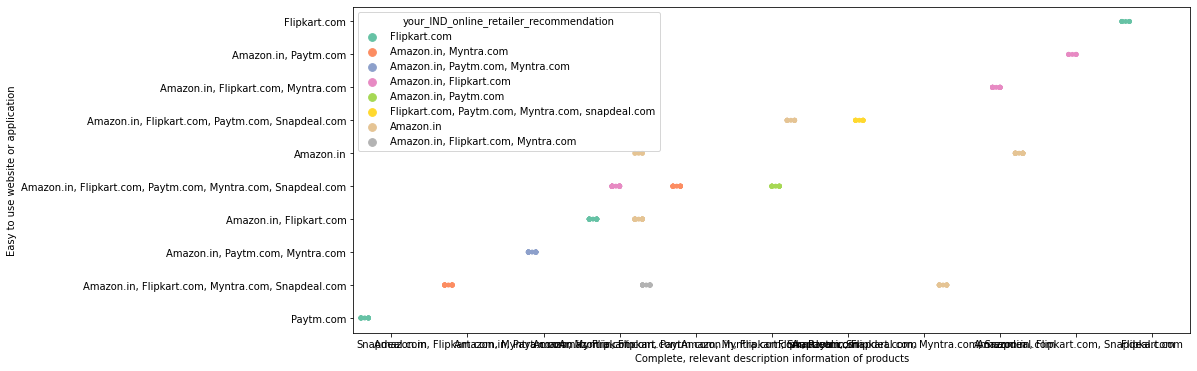

In [57]:
# plotting swarmplot

plt.subplots(figsize=(15, 6))
sns.swarmplot("Complete, relevant description information of products",  'Easy to use website or application', hue="your_IND_online_retailer_recommendation", data=df,split=True,palette='Set2')

<AxesSubplot:xlabel='Reliability of the website or application', ylabel='Perceived Trustworthiness'>

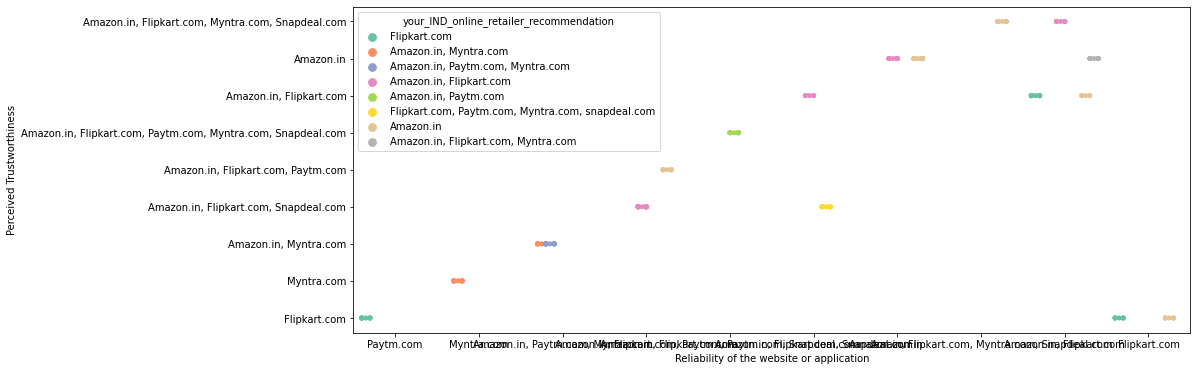

In [58]:
# plotting swarmplot

plt.subplots(figsize=(15, 6))
sns.swarmplot("Reliability of the website or application",  'Perceived Trustworthiness', hue="your_IND_online_retailer_recommendation", data=df,split=True,palette='Set2')

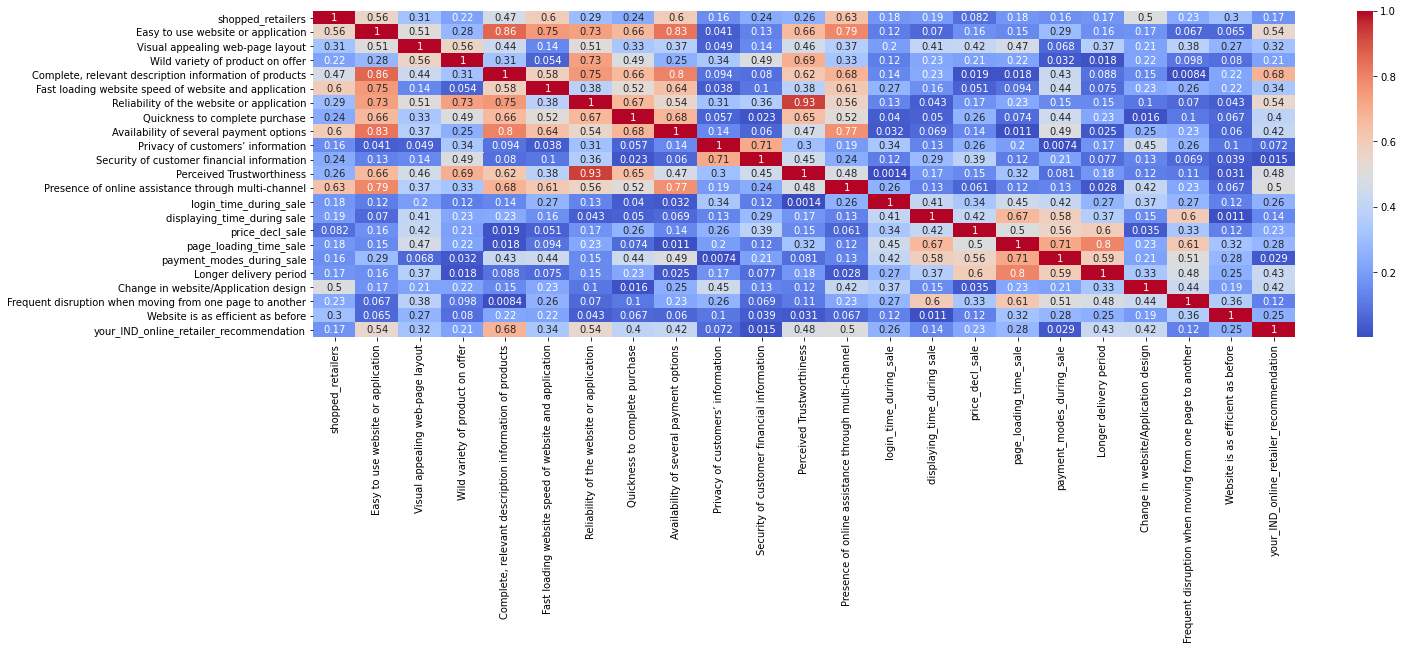

In [54]:
# correlation of factors data

data_corr_2 = factors.corr().abs()
plt.figure(figsize=(22, 6))
sns.heatmap(data_corr_2, annot=True,cmap='coolwarm')
plt.show()

 From the above correlation map, we can see that 'Complete, relevant description information of products', 'Easy to use website or application', 'Reliability of the website or application',  'Perceived Trustworthiness', 'Website is as efficient as before', 'Visual appealing web-page layout', 'Wild variety of product on offer' affect the 'your_IND_online_retailer_recommendation'.